<a href="https://colab.research.google.com/github/Neel7317/Machine_learning/blob/master/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
x1=10*np.random.rand(100,2)

In [3]:
x1.shape

(100, 2)

In [5]:
kmean=KMeans(n_clusters=3)
kmean.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmean.cluster_centers_

array([[8.0879829 , 2.96536641],
       [1.99330267, 3.07381596],
       [4.86354412, 7.87767244]])

In [7]:
kmean.labels_

array([1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0], dtype=int32)

Cluster 1 Inertia 1698.9454914872729
Cluster 2 Inertia 1004.1381263995786
Cluster 3 Inertia 570.2476277302565
Cluster 4 Inertia 381.7368528553623
Cluster 5 Inertia 316.01533222151545
Cluster 6 Inertia 267.7866027922063
Cluster 7 Inertia 227.5324829335059
Cluster 8 Inertia 193.90879015909894
Cluster 9 Inertia 166.28970909828905
Cluster 10 Inertia 149.6618867363316
Cluster 11 Inertia 130.8964131026011
Cluster 12 Inertia 114.36977953827527
Cluster 13 Inertia 105.4184912356333
Cluster 14 Inertia 92.02155069559852
Cluster 15 Inertia 85.13998829822103
Cluster 16 Inertia 76.73597942267838
Cluster 17 Inertia 71.55353191278596
Cluster 18 Inertia 65.8596913830976
Cluster 19 Inertia 60.190883295044344


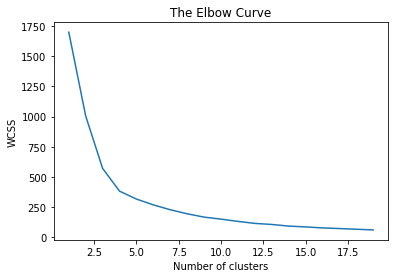

In [13]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=300, random_state=0)
 kmeans.fit(x1)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()

In [15]:
kmean=KMeans(n_clusters=10)
kmean.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:

#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


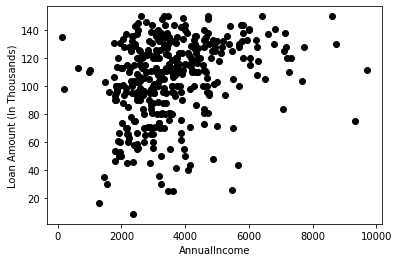

In [18]:

X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

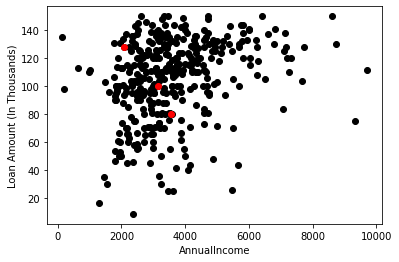

In [19]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [20]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


589.6144743055597
455.4374305147912
443.73435607361273
182.04631783927195
207.02731030932063
277.68763984371935
244.66095351174067
229.06905235705375
218.24897861156342
107.07928213052429
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


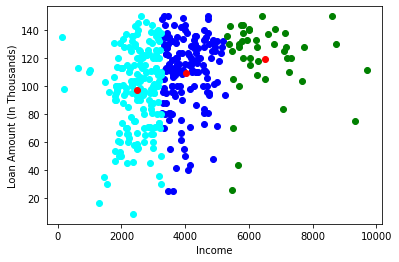

In [21]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()